In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trytry/Database.csv
/kaggle/input/trytry/red_cols.csv
/kaggle/input/trytry/final_ct.csv
/kaggle/input/trytry/df_ct.csv


In [49]:


# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Filter out any warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/trytry/final_ct.csv')

location = ['Latitude', 'Longitude']
grow_time = [ 'Harvest year', 'Sowing month','Harvesting month']
environmental = ['P', 'E', 'PB', 'Tave']
categorical_cols = ['Crop', 'Fertilization CT ', 'N input', 'ST']


def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = [mean-st_dev, mean+st_dev]

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x = points, y = [0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x = [mini,maxi], y = [0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x = [mean], y = [0], color = 'red', label = "mean")
    sns.scatterplot(x = [median], y = [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))



import seaborn as sns
import matplotlib.pyplot as plt

def UVA_category(data, var_group):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize=(7*size, 5), dpi=100)

    # for every variable
    for j, i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()

        # Plotting the variable with every information
        plt.subplot(1, size, j + 1)
        sns.barplot(x=norm_count, y=norm_count.index, order=norm_count.index)
        plt.xlabel('fraction/percent', fontsize=20)
        plt.ylabel('{}'.format(i), fontsize=20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni, norm_count))

    plt.show()

# Example usage:
# Assuming 'data' is your DataFrame and 'var_group' is a list of column names
# UVA_category(data, var_group)




# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))



trimmed_df = df.copy()

import matplotlib.pyplot as plt

def UVA_outlier_remove(data, var_group, trimmed_df):
    size = len(var_group)
    plt.figure(figsize=(7*size, 4), dpi=100)
    for i in var_group:
        # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = quant25 - (1.5 * IQR)
        whis_high = quant75 + (1.5 * IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i] > whis_high])
        outlier_low = len(data[i][data[i] < whis_low])

        # Filtering outliers from trimmed_df
        trimmed_df = trimmed_df[(trimmed_df[i] < whis_high) & (trimmed_df[i] > whis_low)]
    return trimmed_df


trimmed_df = UVA_outlier_remove(df, environmental, trimmed_df)

trimmed_df = UVA_outlier_remove(trimmed_df, location, trimmed_df)

trimmed_df = UVA_outlier_remove(trimmed_df, grow_time, trimmed_df)

<Figure size 2800x400 with 0 Axes>

<Figure size 1400x400 with 0 Axes>

<Figure size 2100x400 with 0 Axes>

In [51]:
trimmed_df.shape

(3171, 14)

In [52]:
trimmed_df.isnull().sum()

Latitude               0
Longitude              0
Crop                   0
Harvest year           0
Fertilization CT     119
N input              301
Yield of CT            0
Sowing month           0
Harvesting month       0
P                      0
E                      0
PB                     0
Tave                   0
ST                     0
dtype: int64

# Linear Regression From Scratch


In [53]:
target = ['Yield of CT']
df = trimmed_df
df.rename(columns={'Yield of CT': 'Yield'}, inplace=True)
df.shape

(3171, 14)

In [54]:
df.isnull().sum()

Latitude               0
Longitude              0
Crop                   0
Harvest year           0
Fertilization CT     119
N input              301
Yield                  0
Sowing month           0
Harvesting month       0
P                      0
E                      0
PB                     0
Tave                   0
ST                     0
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is your original DataFrame
# Splitting the DataFrame into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Converting numpy arrays back to pandas DataFrames
train_df = pd.DataFrame(train_df, columns=df.columns)
test_df = pd.DataFrame(test_df, columns=df.columns)


In [56]:
train_df.shape

(2536, 14)

In [57]:
train_mode = train_df.copy()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    train_mode[col].fillna(mode_value, inplace=True)
train_dropna = train_df.copy()
train_dropna.dropna(inplace=True)
train_dropna.shape
train_dropna.shape

(2294, 14)

In [58]:
train_dropna.isnull().sum()

Latitude             0
Longitude            0
Crop                 0
Harvest year         0
Fertilization CT     0
N input              0
Yield                0
Sowing month         0
Harvesting month     0
P                    0
E                    0
PB                   0
Tave                 0
ST                   0
dtype: int64

In [59]:
train_mode.shape

(2536, 14)

In [60]:
test_df.dropna(inplace=True)
test_df.shape

(575, 14)

In [61]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
OHE_mode_df = pd.get_dummies(train_mode, columns=categorical_columns)
OHE_dropna_df = pd.get_dummies(train_dropna, columns=categorical_columns)
OHE_test_df = pd.get_dummies(test_df, columns=categorical_columns)

In [62]:
OHE_mode_df.shape

(2536, 32)

In [63]:
# For train data
X_train_mode_df = OHE_mode_df.drop(columns=['Yield'])  # Drop the target column to get features
X_train_dropna_df = OHE_dropna_df.drop(columns=['Yield'])  # Drop the target column to get features
Y_train_mode_df = OHE_mode_df['Yield']  # Get the target column
Y_train_dropna_df = OHE_dropna_df['Yield']  # Get the target column


# For test data
X_test = OHE_test_df.drop(columns=['Yield'])  # Drop the target column to get features
Y_test = OHE_test_df['Yield']  # Get the target column


In [64]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert DataFrames to numpy arrays for train and test data
X_train_mode = X_train_mode_df.values
X_train_dropna = X_train_dropna_df.values
Y_train_mode = Y_train_mode_df.values
Y_train_dropna = Y_train_dropna_df.values
X_test = X_test.values
Y_test = Y_test.values

# Perform StandardScaler fit_transform on train data and transform on test data
scaler = StandardScaler()
X_train_mode = scaler.fit_transform(X_train_mode)
X_train_dropna = scaler.transform(X_train_dropna)
X_test = scaler.transform(X_test)


In [65]:
X_train_mode.shape

(2536, 31)

# Scikit Linear Regression

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model_mode = LinearRegression()

# Fit the model on the training data
model_mode.fit(X_train_mode, Y_train_mode)

# Predict the target variable on the test data
y_pred_mode = model_mode.predict(X_test)

# Evaluate the model using mean squared error
rmse_mode = mean_squared_error(Y_test, y_pred_mode)**0.5
print("Root Mean Squared Error:", rmse_mode)

# Create a linear regression model
model_dropna = LinearRegression()

# Fit the model on the training data
model_dropna.fit(X_train_dropna, Y_train_dropna)

# Predict the target variable on the test data
y_pred_dropna = model_dropna.predict(X_test)

# Evaluate the model using mean squared error
rmse_dropna = mean_squared_error(Y_test, y_pred_dropna)**0.5
print("Root Mean Squared Error:", rmse_dropna)



Root Mean Squared Error: 2650.6320653368684
Root Mean Squared Error: 2642.7412700153673


# Scikit Regularization

In [67]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns)
one_hot_encoded_df.dtypes
SEED = 42

# Selecting features (X) and target (y)
# Extracting features (X)
predictorVars = one_hot_encoded_df.drop(columns=['Yield'])
# Extracting target variable (y)
targetVar = one_hot_encoded_df['Yield']

# Splitting the dataset into train and test sets (80% train, 20% test)
X_train,X_test,Y_train,Y_test = train_test_split(predictorVars, targetVar, test_size=0.2, random_state=56)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
SEED

42

In [69]:
# Create a linear regression model
model_mode = LinearRegression()

# Fit the model on the training data
model_mode.fit(X_train, Y_train)

# Predict the target variable on the test data
y_pred = model_mode.predict(X_test)

# Evaluate the model using mean squared error
rmse_mode = mean_squared_error(Y_test, y_pred)**0.5
print("Root Mean Squared Error:", rmse_mode)

Root Mean Squared Error: 2472.533780843067


In [70]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create and train the Lasso regression model
alpha = 2  # Regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, Y_train)
Y_pred = lasso_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(Y_test, Y_pred)**0.5
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 2459.2968870848094


In [71]:
from sklearn.linear_model import Ridge

# Create and train the Ridge regression model
alpha = 1  # Regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, Y_train)

Y_pred = ridge_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(Y_test, Y_pred)**0.5
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 2457.024731466309


# From Scratch

In [72]:
class linear_regression:
    def __init__(self,features=1,epochs=1000,learning_rate=0.1,regularization="None",lambda_=1):
        self.features=features
        ## Initializing weights and biases to 0
        self.weights=np.zeros(features)
        self.bias=0
        self.epochs=epochs
        self.regularization=regularization
        self.lambda_=lambda_
        self.learning_rate=learning_rate
        self.loss_history = []
    def mse(self,y,y_hat):
        diff=y-y_hat
        reg=0.
        if(self.regularization=="L1"):
            reg=np.sum(np.abs(self.weights))*self.lambda_
        if(self.regularization=="L2"):
            reg=np.sum(self.weights**2)*self.lambda_
        return np.sum(diff**2)/(2*len(y))+reg
    def fit(self,x,y):
        assert self.features==x.shape[1],"Number of features don't match"
        assert y.shape[0]==x.shape[0],"Number of entries don't match"
        n=x.shape[0]
        for epoch in range(self.epochs):
            y_bar=np.dot(x,self.weights)+self.bias
            diff=y-y_bar
            self.loss_history.append(self.mse(y,y_bar)**0.5)
            grad_w=np.dot(x.T,diff)*self.learning_rate/n
            if(self.regularization=="L1"):
                sign=np.where(self.weights>0,1,-1)
                grad_w+=sign*self.lambda_
            if(self.regularization=="L2"):
                grad_w +=2*self.weights*self.lambda_
            self.weights+=grad_w
            grad_b=np.sum(diff)*self.learning_rate/n
            self.bias+=grad_b
    def predict(self,x):
        assert self.features==x.shape[1],"Number of features don't match"
        return np.dot(x,self.weights)+self.bias

In [73]:
model_scratch = linear_regression(features=X_train.shape[1],epochs=500,learning_rate=0.01)
model_scratch.fit(X_train,Y_train)

In [74]:
Y_pred_scratch=model_scratch.predict(X_test)
# Evaluate the model using mean squared error
rmse = mean_squared_error(Y_test, Y_pred_scratch)**0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2502.917210635656


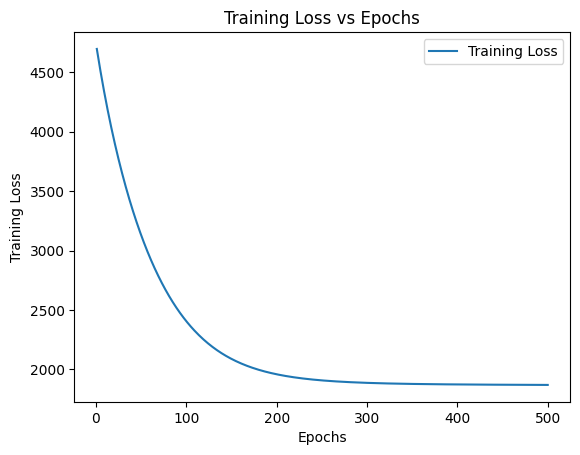

In [75]:
# Plot training loss vs epochs
plt.plot(range(1, model_scratch.epochs + 1), model_scratch.loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()


In [76]:
def plot_predictions_vs_truevals(predictions,y_test):    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, color='blue', label='Predictions vs True Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('Predictions vs True Values')
    plt.legend()
    plt.grid(True)
    plt.show()

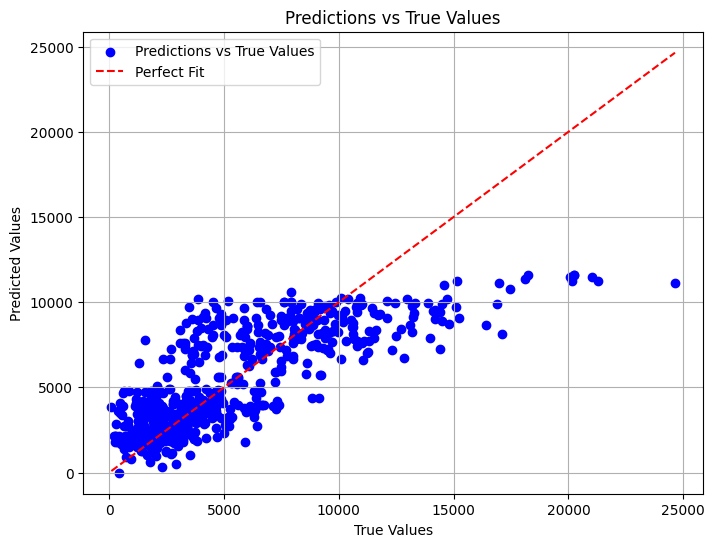

In [77]:
plot_predictions_vs_truevals(Y_pred_scratch, Y_test)

# try polynomial


In [78]:
from sklearn.preprocessing import PolynomialFeatures # polynommial features(extended features)
poly_features = PolynomialFeatures(degree=2) # decide the maximal degree of the polynomial feature
X_ploy = poly_features.fit_transform(X_train) # convert the original feature to polynomial feature
X_ploy_test = poly_features.fit_transform(X_test) # convert the original feature to polynomial feature

In [79]:
scaler = StandardScaler()
X_ploy = scaler.fit_transform(X_ploy)
X_ploy_test = scaler.transform(X_ploy_test)

In [80]:
import pandas as pd


# Assuming X_train is a NumPy array and you don't have access to column names directly
# Fit the decision tree model

# Get feature importances
importances = model_scratch.weights

# Create a pandas Series with feature importances using numerical indices
num_features = X_train.shape[1]  # Number of features
feature_importance_series = pd.Series(importances, index=range(num_features))

# Sort the feature importances in descending order
sorted_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print(sorted_importances)

12    1472.514908
2      779.248606
0      617.938263
13     248.758481
1      247.724244
25     167.469888
7      130.131694
5      129.545798
21      58.200018
29      45.227277
28      41.082081
6       16.327973
18      -2.216254
8       -9.968283
26     -13.914960
19     -72.866937
27     -73.374401
30     -75.346489
22     -99.118867
14    -120.750274
20    -147.534502
4     -208.564236
24    -240.748907
10    -251.313666
23    -257.500093
16    -338.174588
3     -442.979821
9     -514.390970
11    -546.724069
17    -614.293958
15    -828.165928
dtype: float64


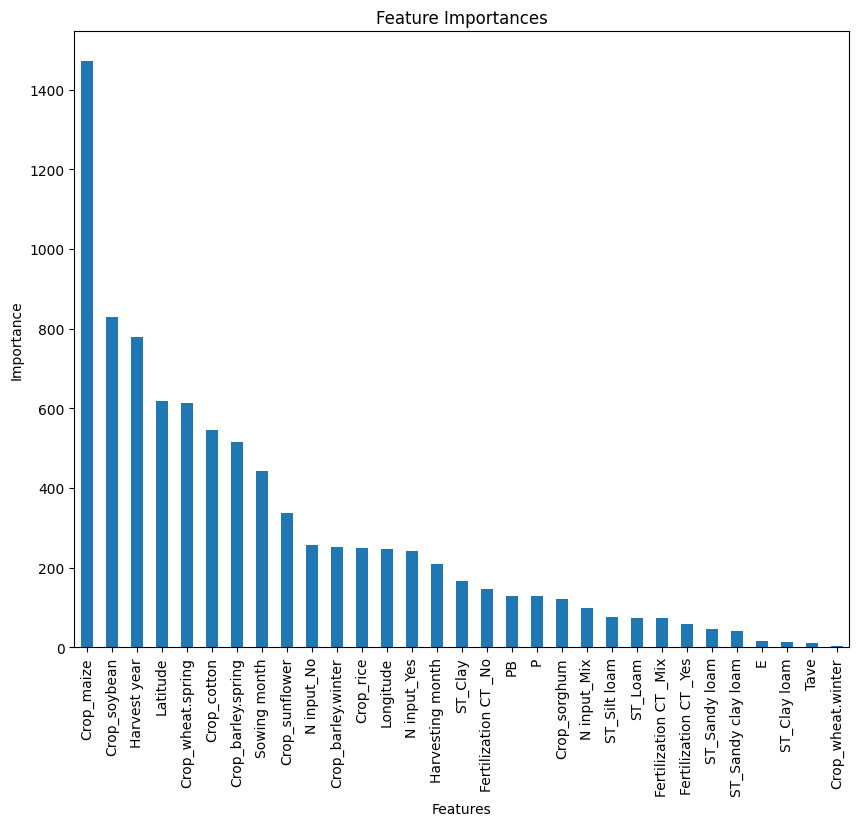

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already calculated feature importances and stored them in a pandas Series
feature_importances = pd.Series(abs(model_scratch.weights), index=predictorVars.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [83]:
model_scratch = linear_regression(features=X_ploy.shape[1],epochs=1500,learning_rate=0.005)
model_scratch.fit(X_ploy,Y_train)
Y_pred_scratch=model_scratch.predict(X_ploy_test)
# Evaluate the model using mean squared error
rmse = mean_squared_error(Y_test, Y_pred_scratch)**0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1962.1696781261921


In [44]:
model_scratch.weights

array([ 2.76693556e+02,  7.12059331e+01, -1.02024659e+01,  9.06566212e+01,
       -1.88760917e+02, -1.41928525e+02,  6.18676071e+01,  3.58656888e+01,
        4.88370714e+01,  5.27574406e+00, -7.10916598e+01, -6.92194452e+01,
       -5.10990424e+01,  3.42955784e+02, -3.89121326e+01, -4.65335626e+01,
       -1.06093642e+02, -3.50342466e+01, -7.05319365e+01, -1.35182509e+02,
       -7.03715346e+01, -1.00179509e+02,  1.20654768e+02, -6.80582360e+01,
       -1.08644186e+02,  9.34143417e+01, -3.22724168e+01, -5.02567637e+01,
        8.71868398e+01, -2.96147868e+01, -4.55462237e+01, -1.69318502e+01,
        1.49710744e+02, -3.19882884e+01,  1.00773388e+01, -4.39923927e+01,
       -1.22390898e+01, -2.11709994e+01, -2.20151131e+01, -1.20921143e+01,
       -8.35509657e+01, -2.00724393e+01, -1.50968712e+01, -4.14866644e+00,
        9.57207693e+01, -1.56633128e+01, -2.10634692e-01, -3.23743272e+01,
       -2.16502268e+01, -4.08386853e+01, -2.93198705e+01, -2.55064301e+01,
       -2.93069257e+00, -

In [84]:
# Create a linear regression model
model_mode = LinearRegression()

# Fit the model on the training data
model_mode.fit(X_ploy, Y_train)

# Predict the target variable on the test data
y_pred = model_mode.predict(X_ploy_test)

# Evaluate the model using mean squared error
rmse_mode = mean_squared_error(Y_test, y_pred)**0.5
print("Root Mean Squared Error:", rmse_mode)

Root Mean Squared Error: 399260407688267.4


In [43]:
model_mode.coef_

array([-3.25752378e+09, -3.87923649e+09,  1.88808687e+09,  1.83707385e+09,
       -1.10911534e+09,  2.31107589e+09, -1.91656182e+09,  2.19475461e+09,
        1.27249257e+09,  1.07410595e+09,  3.89794681e+10,  3.04739046e+10,
       -4.38442334e+10,  6.76140108e+10,  1.28886200e+10,  2.96018853e+10,
       -1.11640908e+11, -2.23609606e+10, -2.34042004e+10, -6.29551055e+10,
       -5.80504636e+10, -7.11711803e+10,  4.00477497e+10,  6.67721255e+09,
       -7.43630664e+10,  3.52080394e+10, -5.89470254e+10, -5.27289114e+10,
        8.63657773e+10, -3.47739341e+10, -7.87386583e+09, -1.63146935e+10,
       -9.20600724e+02,  9.67014168e+02,  8.07482014e+01, -5.70567390e+03,
        4.97708484e+03, -1.17478285e+08,  5.23442792e+07,  1.10381217e+08,
       -3.36603239e+02,  3.88084191e+09,  3.16835618e+09,  2.49814804e+09,
        7.63457511e+09,  2.77550409e+09,  2.99452825e+09,  5.43140149e+09,
       -1.54924659e+10,  3.61940256e+09,  6.26144739e+09, -2.76264001e+10,
        2.46351067e+02, -

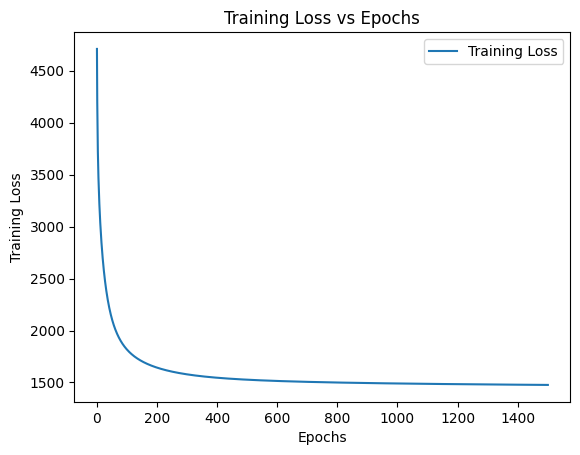

In [230]:
# Plot training loss vs epochs
plt.plot(range(1, model_scratch.epochs + 1), model_scratch.loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()


# Regularisation check

In [30]:
lasso_scratch = linear_regression(features=X_train.shape[1],regularization="L1",lambda_=1, learning_rate = 0.15)
lasso_scratch.fit(X_train,Y_train)
Y_pred_scratch=lasso_scratch.predict(X_test)
# Evaluate the model using mean squared error
rmse = mean_squared_error(Y_test, Y_pred_scratch)**0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2454.5856015596755


In [31]:
ridge_scratch = linear_regression(features=X_train.shape[1],regularization="L2",lambda_=0.0001, learning_rate = 0.15)
ridge_scratch.fit(X_train,Y_train)
Y_pred_scratch=ridge_scratch.predict(X_test)
# Evaluate the model using mean squared error
rmse = mean_squared_error(Y_test, Y_pred_scratch)**0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2455.9797904398133
